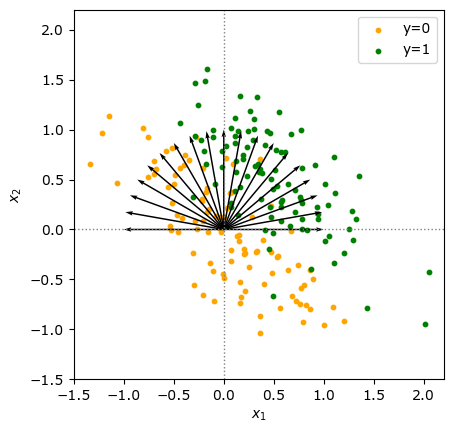

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# (a) & (b)
# data preparation
data = pd.read_csv("applesOranges.csv")
data = data.rename(columns={'x.1':'x_1', 'x.2':'x_2'})
x_1 = data['x_1']
x_2 = data['x_2']
x = np.array([x_1, x_2])
y = data['y']
    
# set different colors by y values
color_map = {1:'green', 0:'orange'}
groups = data.groupby('y')

fig, ax = plt.subplots()
for y_value, group in groups:
    ax.scatter(group.x_1, group.x_2, s=10, c=color_map[y_value], label=f'y={y_value}')
ax.legend()
ax.set_aspect('equal')
ax.axvline(x=0, linestyle='dotted', color='gray', linewidth=1)
ax.axhline(y=0, linestyle='dotted', color='gray', linewidth=1)

# define and plot vectors
degrees = np.arange(0, 181, 10)
angles = np.radians(degrees)
w = np.array([(np.cos(a), np.sin(a)) for a in angles])

x_origin = np.zeros(len(w))
y_origin = np.zeros(len(w))

ax.quiver(x_origin, y_origin, w[:, 0], w[:, 1], angles='xy', scale_units='xy', scale=1, width=0.004)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis([-1.5, 2.2, -1.5, 2.2]) # [xmin, xmax, ymin, ymax]
plt.show()

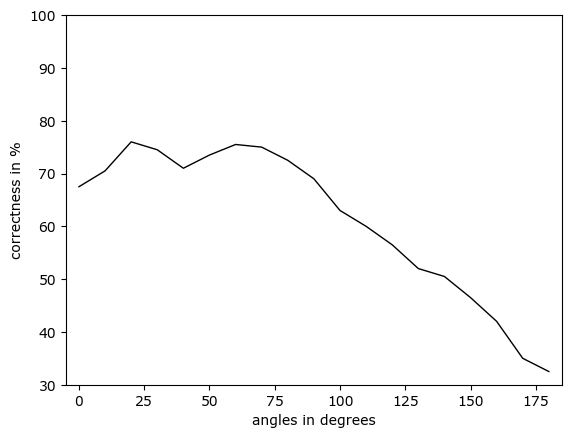

In [3]:
# (b)
# dot product of w and x & binary transfer function
theta = 0
input = np.array(np.dot(w, x) - theta)
# print(np.dot(w, x).shape) -> (19, 200)
y_pred = (input >= 0).astype(int)
# print(y_pred.shape) -> (19, 200)

# reshape y for numpy (instead of dataframe series from pandas)
y_reshaped = y.values.reshape(1, -1)

# compare y and predicted values -> 1 for correct, 0 for wrong
compare = (y_pred == y_reshaped).astype(int)
correctness = np.array(np.mean(compare, axis=1)*100)
# print(min(correctness)) -> 32.5

# plot angle vs. correctness
fig, ax = plt.subplots()
ax.plot(degrees, correctness, 'black', linewidth=1.0)
plt.axis((-5, 185, 30, 100))
plt.xlabel('angles in degrees')
plt.ylabel('correctness in %')
plt.show()

best correctness: 80.0
best theta: 0.152


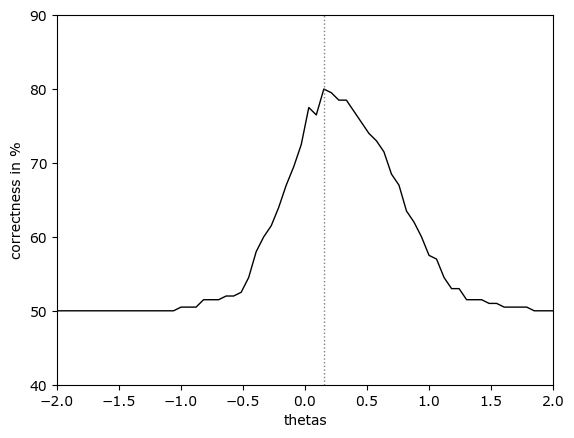

In [4]:
# (c)
# pick vector with best performance
best_index = np.argmax(correctness) # max(correctness) = 76.0, best_index = 2 (third vector)
best_w = w[best_index]

thetas = np.linspace(-3, 3, 100)
best_theta = None
best_cor = -1
correctness_list = []

# pick best bias value for the best vector
for theta_0 in thetas:
    input_0 = np.dot(best_w, x) - theta_0
    y_pred_0 = (input_0 >= 0).astype(int)
    compare_0 = (y_pred_0 == y).astype(int)
    correctness_0 = np.mean(compare_0)*100
    correctness_list.append(correctness_0)

    if correctness_0 > best_cor:
        best_cor = correctness_0
        best_theta = theta_0
        best_y_pred_0 = y_pred_0

print(f"best correctness: {best_cor}")
print(f"best theta: {round(best_theta, 3)}")

# plot bias vs. correctness
fig, ax = plt.subplots()
ax.plot(thetas, correctness_list, 'black', linewidth=1.0)
ax.axvline(x=best_theta, linestyle='dotted', color='gray', linewidth=1)
plt.axis((-2, 2, 40, 90))
plt.xlabel('thetas')
plt.ylabel('correctness in %')
plt.show()

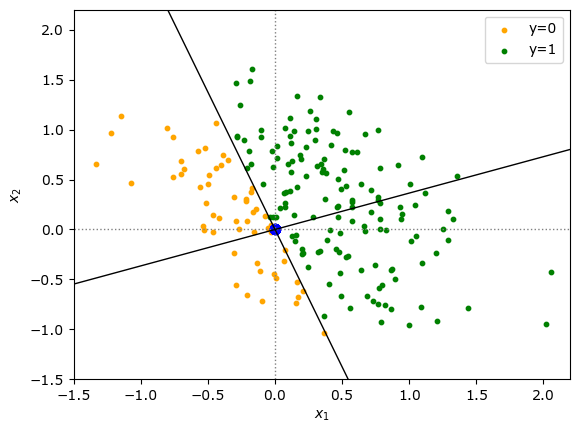

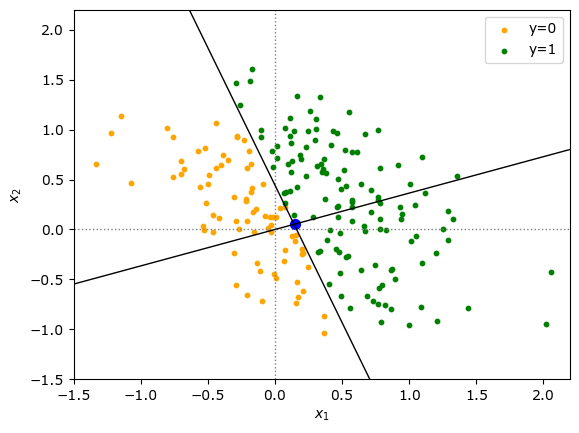

In [5]:
# (d)
# add column to the dataframe: y_pred with best correctness & with bias
data['y_pred'] = y_pred[best_index]

# set different colors by predicted classification
color_map = {1:'green', 0:'orange'}
groups_pred = data.groupby('y_pred')

fig, ax = plt.subplots()
for y_value, group in groups_pred:
    ax.scatter(group.x_1, group.x_2, s=10, c=color_map[y_value], label=f'y={y_value}')
ax.legend()
ax.axvline(x=0, linestyle='dotted', color='gray', linewidth=1.0)
ax.axhline(y=0, linestyle='dotted', color='gray', linewidth=1.0)

x_origin = np.zeros(len(w))
y_origin = np.zeros(len(w))

x_1_range = np.linspace(-3, 3, 100)
x_2_range = np.linspace(-3, 3, 100)

line_x_1 = x_1_range*best_w[0]
line_x_2 = x_2_range*best_w[1]

if best_w[1] != 0:
    decision_line = (-best_w[0]*x_1_range + theta) / best_w[1]
else:
    decision_line = np.full_like(x_1_range, np.inf)

# plot decision line dividing plane by y
ax.plot(x_1_range, decision_line, 'black', linewidth=1.0)
ax.plot(line_x_1, line_x_2, 'black', linewidth=1.0)
ax.scatter(x_origin, y_origin, s=50, c='blue')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis([-1.5, 2.2, -1.5, 2.2])
plt.show()

# repeat with bias for best performance (based on the best vector)
data['y_pred_0'] = best_y_pred_0
groups_pred_0 = data.groupby('y_pred_0')

fig_0, ax_0 = plt.subplots()
for y_value, group in groups_pred_0:
    ax_0.scatter(group.x_1, group.x_2, s=10, c=color_map[y_value], label=f'y={y_value}')
ax_0.legend()
ax_0.axvline(x=0, linestyle='dotted', color='gray', linewidth=1.0)
ax_0.axhline(y=0, linestyle='dotted', color='gray', linewidth=1.0)

if best_w[1] != 0:
    decision_line_0 = (-best_w[0]*x_1_range + best_theta) / best_w[1]
else:
    decision_line_0 = np.full_like(x_1_range, np.inf)

ax_0.plot(x_1_range, decision_line_0, 'black', linewidth=1.0)
ax_0.plot(line_x_1, line_x_2, 'black', linewidth=1.0)
ax_0.scatter(best_theta, (best_w[1] / (best_w[0]**2 + best_w[1]**2))*best_theta, s=50, c='blue')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis([-1.5, 2.2, -1.5, 2.2])
plt.show()

best correctness: 90.5%
angle: 50
bias: 0.333


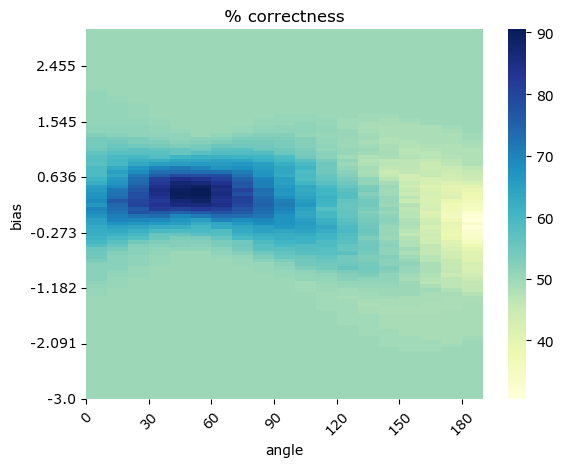

In [24]:
# (e)
# find the best combination of every w and theta

correctness_all_list = []
correctness_best_list = []
best_thetas_list = []
degrees_all_list = []

for i in range(len(w)):
    best_thetas = None
    best_cor_all = -1
    
    for theta in thetas:
        inputs = np.dot(w[i], x) - theta
        y_preds = (inputs >= 0).astype(int)
        compares = (y_preds == y).astype(int)
        correctness_all = np.mean(compares)*100
    
        if correctness_all > best_cor_all:
            best_cor_all = correctness_all
            best_thetas = theta
        # 19 different degrees, correctness for every vector, 100 times (for every theta)
        degrees_all_list.append(degrees[i])
        correctness_all_list.append(correctness_all)
            
    correctness_best_list.append(best_cor_all)
    best_thetas_list.append(best_thetas)

best_result_i = np.argmax(correctness_all_list) # 555

# 19 x 100 thetas for all vectors
thetas_all_list = np.around(np.tile(thetas, 19), 3)

# define a dataframe
data_all = {'angle': degrees_all_list, 'correctness': correctness_all_list, 'bias': thetas_all_list}
df_all = pd.DataFrame(data_all)

# plot the performance of all combinations in heatmap
df_all_pivot = df_all.pivot(index='bias', columns='angle', values='correctness')
ax_heat = sns.heatmap(df_all_pivot, cmap='YlGnBu', cbar=True)
ax_heat.invert_yaxis()

n_columns = 3
n_index = 15

x_pos = np.arange(0, len(df_all_pivot.columns), n_columns)
ax_heat.set_xticks(x_pos)
ax_heat.set_xticklabels(df_all_pivot.columns[x_pos], rotation=45)

y_pos = np.arange(0, len(df_all_pivot.index), n_index)
ax_heat.set_yticks(y_pos)
ax_heat.set_yticklabels(df_all_pivot.index[y_pos])

print(f'best correctness: {max(correctness_all_list)}%')
print(f'angle: {degrees_all_list[best_result_i]}')
print(f'bias: {thetas_all_list[best_result_i]}')

plt.scatter(50, 0.333, c='white', marker='x')

plt.title('% correctness')
plt.show()